In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cycler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [4]:
# Dark mode for charts
colors = cycler('color', ['#669FEE', '#66EE91', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor='#313233', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors, labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray'),
plt.rc('ytick', direction='out', color='gray'),
plt.rc('legend', facecolor='#313233', edgecolor='#313233')
plt.rc('text', color='#C9C9C9')
plt.rc('figure', facecolor='#313233')

# Data Analysis

In [8]:
df = pd.read_csv('Classified Data.csv')
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [14]:
# standardize data
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [18]:
# perform the standardization process
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784987],
       ...,
       [ 0.64177715, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602454, -0.85567   ],
       [-0.38765353, -0.59589427, -1.43139809, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [19]:
# creating the dataframe with standardized data except last column
df_features = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_features.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


# K Nearest Neighbors Model

In [20]:
# X is our features, y is what we want to predict 
X = df_features
y = df['TARGET CLASS']

In [21]:
# split into train and test data, 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
len(X_train), len(X_test), len(y_train), len(y_test)

(700, 300, 700, 300)

In [22]:
# train the model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
# predict using the model
predictions = knn.predict(X_test)
predictions

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], d

In [24]:
# Report of prediction compared to y_test
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       140
           1       0.91      0.90      0.90       160

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [29]:
# ellbow method to find a better n_neighbors value to increase the prediction
error_rate = []

for i in range(1, 40):
    knn_values = KNeighborsClassifier(n_neighbors=i)
    knn_values.fit(X_train, y_train)
    pred_i = knn_values.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

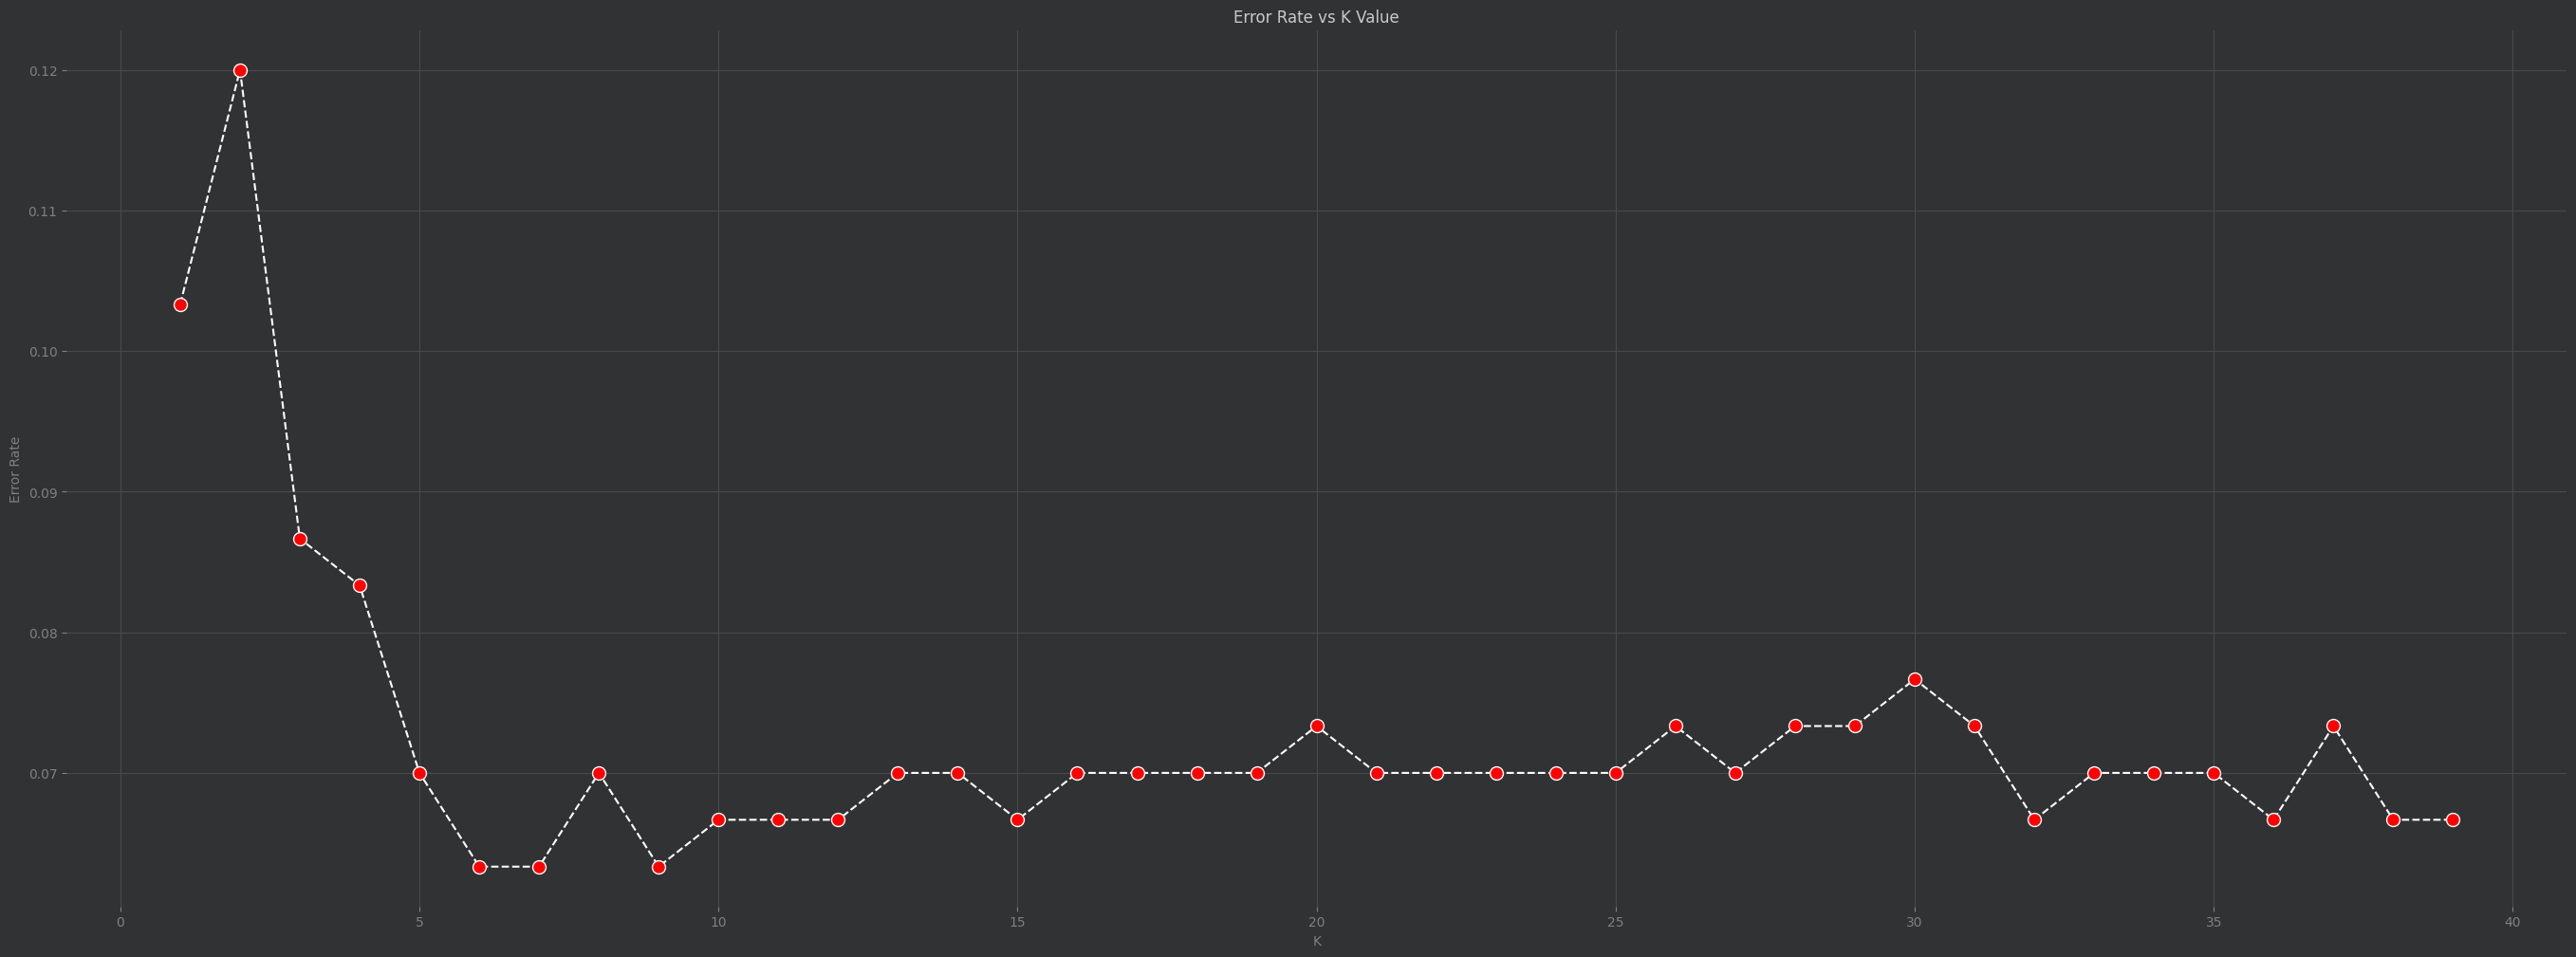

In [44]:
# check the errors to take a better n_neighbors, a good one is 10, 32, 36... we have to check the report for them and see if we increse the metrics f1-score...
plt.figure(figsize=(34, 12))
plt.plot(range(1, 40), error_rate, color='white', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()